# Importing the libraries

In [1]:
# All required libraries are imported
import numpy as np
import pandas as pd
from scipy import stats
import glob as gb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Loading and pre processing the Data 

In [2]:
#Loading and pre processing the data
path = r"M:\Data Science(CE888)\Raw_data\**\*.csv"
filenames = gb.glob(path)
Particpant_num = 0
par_list = set()
df_BV = pd.DataFrame()
df_AC =  pd.DataFrame()
df_ED =  pd.DataFrame()
df_H =  pd.DataFrame()
for filename in filenames:
    if 'ACC.csv' in filename:
        Particpant_num = Particpant_num+ 1
        dp = pd.read_csv(filename, header = None,names = ['ACC_X', 'ACC_Y', 'ACC_Z'])
        st = dp.iloc[0,0]   #Starting time
        ft = dp.iloc[1,0]   #Frequency
        ft = int(ft)
        dp.drop(index =[0,1], inplace = True)
        dp = dp.reset_index()
        count = 0
        df1 = {}
        df_ACC = pd.DataFrame()
        while(count < len(dp)):
            df1= {
                'Participant' : Particpant_num,
                'Time Stamp' : st ,
                'ACC_X' : [np.mean(dp['ACC_X'][count : count+ft])], #Calculating the avg ACC X between the frequencies
                'ACC_Y' : [np.mean(dp['ACC_Y'][count : count+ft])], #Calculating the avg ACC Y between the frequencies
                'ACC_Z' : [np.mean(dp['ACC_Z'][count : count+ft])], #Calculating the avg ACC Z between the frequencies
                }
            st = st + 1
            count = count + ft
            df2 = pd.DataFrame(df1)
            df_ACC = pd.concat([df_ACC,df2], ignore_index=True)   #Making a dafa frame of values from each ACC
        df_AC = pd.concat([df_AC,df_ACC], ignore_index=True)      #Concatinating all data frames into 1
    elif 'BVP.csv' in filename:
        dp = pd.read_csv(filename, header = None, names = ["BVP"])
        st = dp.iloc[0,0]      #Starting time
        ft = dp.iloc[1,0]      #Frequency
        ft = int(ft)
        dp.drop(index =[0,1], inplace = True)
        dp = dp.reset_index()
        count = 0
        df1 = {}
        df_BVP = pd.DataFrame()
        while(count < len(dp)):
            df1= {
                'Participant' : Particpant_num,
                'Time Stamp' : st,                
                'BVP' : [np.mean(dp["BVP"][count : count+ft])],      #Calculating the avg BVP between the frequencies
                 }
            st = st + 1
            count = count + ft
            df2 = pd.DataFrame(df1)
            df_BVP = pd.concat([df_BVP,df2], ignore_index=True)     #Making a dafa frame of values from each BVP
        df_BV = pd.concat([df_BV,df_BVP], ignore_index=True)       #Concatinating all data frames into 1
    elif 'EDA.csv' in filename:
        dp = pd.read_csv(filename, header =None, names = ["EDA"])
        st = dp.iloc[0,0]     #Starting time
        ft = dp.iloc[1,0]     #Frequency
        ft = int(ft)
        dp.drop(index =[0,1], inplace = True)
        dp = dp.reset_index()
        count = 0
        df1 = {}
        df_EDA = pd.DataFrame()
        while(count < len(dp)):
            df1= {
                'Participant' : Particpant_num,
                'Time Stamp' : [st],
                'EDA' : [np.mean(dp["EDA"][count : count+ft])],    #Calculating the avg EDA between the frequencies
                }
            st = st + 1
            count = count + ft
            df2 = pd.DataFrame(df1)
            df_EDA = pd.concat([df_EDA,df2], ignore_index=True)    #Making a dafa frame of values from each EDA
        df_ED = pd.concat([df_ED,df_EDA], ignore_index=True)       #Concatinating all data frames into one
    elif 'HR.csv' in filename:
        dp = pd.read_csv(filename, header = None, names = ["HR"])
        st = dp.iloc[0,0]     #Starting time
        ft = dp.iloc[1,0]     #Frequency
        ft = int(ft)
        dp.drop(index =[0,1], inplace = True)
        dp = dp.reset_index()
        count = 0
        df1 = {}
        df_HR = pd.DataFrame()
        while(count < len(dp)):
            df1= {
                'Participant' : Particpant_num,
                'Time Stamp' : st,
                'HR' : [np.mean(dp["HR"][count : count+ft])],   #Calculating the avg HR between the frequencies
                 }
            st = st + 1
            count = count + ft
            df2 = pd.DataFrame(df1)
            df_HR = pd.concat([df_HR,df2], ignore_index=True)   #Making a dafa frame of values from each HR
        df_H = pd.concat([df_H,df_HR], ignore_index=True)      #Concatinating all data frames into one
    par_list.add(Particpant_num)

In [3]:
#Merging all 4 final data frames into one
merge1 = pd.merge(df_AC,df_BV, on =['Time Stamp',"Participant"],how = 'outer')
merge2 = pd.merge(df_H,df_ED, on = ['Time Stamp',"Participant"],how = 'outer')
merged_df = pd.merge(merge1,merge2, on = ['Time Stamp',"Participant"],how = 'outer')

In [4]:
merged_df.head()

,Participant,Time Stamp,ACC_X,ACC_Y,ACC_Z,BVP,HR,EDA
0,1,1.644226e+09,-4.15625,41.06250,48.34375,15.760000,NaN,0.111789
1,1,1.644226e+09,-6.25000,39.37500,49.68750,-41.792500,NaN,0.166243
2,1,1.644226e+09,-5.68750,39.53125,49.37500,32.554219,NaN,0.165602
3,1,1.644226e+09,-7.68750,27.93750,55.15625,72.609062,NaN,0.166243
4,1,1.644226e+09,-9.62500,3.37500,62.06250,-2.659531,NaN,0.165602


# Data Analysis

In [5]:
#Number of missing values in the data
for columns in merged_df:
    print("Null values in",columns,"=",merged_df[columns].isnull().sum())

Null values in Participant = 0
Null values in Time Stamp = 0
Null values in ACC_X = 29
Null values in ACC_Y = 29
Null values in ACC_Z = 29
Null values in BVP = 24
Null values in HR = 387
Null values in EDA = 32


In [6]:
#Dropping rows with missing values
merged_df.dropna(inplace = True)

In [7]:
#HERE WE ARE MAKING A NEW COLUMN OUTPUT TO VALIDATE HOW MANY PARTICPANTS HAVE STRESS AND HOW MANY DON'T
#Adding Tags to the dataframe
file = []
# making list of data frames of tags w.r.t participants
for name in gb.glob(r'M:\Data Science(CE888)\Raw_data\*\tag*.csv'):  
    df = pd.read_csv(name,header= None)
    file.append(df)
count = 0
merged_df['Output'] = 0
for i in range(len(file)):
    count += 1
    for j in range(0,6):
        if j%2 == 0:
            cond = [np.logical_and(np.logical_and(merged_df["Time Stamp"]>file[i][0][j],merged_df["Time Stamp"]<file[i][0][j+1]),merged_df["Participant"]== count)]
            choice = [1]
            merged_df['Output'] = np.select(cond,choice,default = merged_df['Output'])

In [8]:
merged_df.head()

,Participant,Time Stamp,ACC_X,ACC_Y,ACC_Z,BVP,HR,EDA,Output
10,1,1.644226e+09,-13.65625,-9.40625,60.90625,60.935000,83.00,0.170087,0
11,1,1.644226e+09,-16.37500,-8.59375,60.71875,-27.887500,83.00,0.174251,0
12,1,1.644226e+09,-8.43750,-14.31250,59.53125,-2.248437,72.67,0.179375,0
13,1,1.644226e+09,-26.46875,-15.50000,56.09375,-121.485156,87.00,0.171048,0
14,1,1.644226e+09,-26.71875,-17.50000,54.96875,125.431250,80.00,0.169126,0


In [9]:
#Finding the data types
merged_df.dtypes

Participant      int64
Time Stamp     float64
ACC_X          float64
ACC_Y          float64
ACC_Z          float64
BVP            float64
HR             float64
EDA            float64
Output           int64
dtype: object

In [10]:
 # To verify the tags : 1-Stressed and 0- Not stressed
merged_df["Output"].value_counts() 

0    77213
1    38487
Name: Output, dtype: int64

In [11]:
#Dropping duplicates 
merged_df = merged_df.drop_duplicates() 

In [12]:
# Merging the output to understand the correlation between the variables
merged_df.columns= ['Participant', 'Time Stamp', 'ACC_X', 'ACC_Y', 'ACC_Z', 'BVP', 'HR', 'EDA', 'Output']
corr = merged_df.corr()
corr['Output']

Participant    0.024301
Time Stamp     0.023677
ACC_X          0.057671
ACC_Y          0.047215
ACC_Z          0.109333
BVP           -0.000234
HR             0.127509
EDA            0.119059
Output         1.000000
Name: Output, dtype: float64

In [13]:
merged_df

,Participant,Time Stamp,ACC_X,ACC_Y,ACC_Z,BVP,HR,EDA,Output
10,1,1.644226e+09,-13.656250,-9.406250,60.90625,60.935000,83.00,0.170087,0
11,1,1.644226e+09,-16.375000,-8.593750,60.71875,-27.887500,83.00,0.174251,0
12,1,1.644226e+09,-8.437500,-14.312500,59.53125,-2.248437,72.67,0.179375,0
13,1,1.644226e+09,-26.468750,-15.500000,56.09375,-121.485156,87.00,0.171048,0
14,1,1.644226e+09,-26.718750,-17.500000,54.96875,125.431250,80.00,0.169126,0
...,...,...,...,...,...,...,...,...,...
116073,35,1.646842e+09,-19.000000,-5.687500,60.62500,4.200781,65.37,0.213929,0
116074,35,1.646842e+09,-18.968750,-2.718750,60.65625,-16.105000,65.42,0.212327,0
116075,35,1.646842e+09,-15.781250,0.281250,61.87500,-1.195000,65.45,0.219695,0
116076,35,1.646842e+09,-17.156250,0.062500,61.90625,15.005781,65.47,0.223218,0


# 1) Descriptive Statistics


1. To view basic statistics of the dataframe:

In [14]:
print(merged_df.describe())

         Participant    Time Stamp          ACC_X          ACC_Y  \
count  115700.000000  1.157000e+05  115700.000000  115700.000000   
mean       17.985454  1.645651e+09     -34.152119      -1.287216   
std        10.150559  8.418832e+05      21.137050      20.518861   
min         1.000000  1.644226e+09     -71.250000     -64.156250   
25%         9.000000  1.644844e+09     -51.937500     -11.562500   
50%        18.000000  1.645459e+09     -34.468750      -2.093750   
75%        27.000000  1.646647e+09     -21.000000       8.000000   
max        35.000000  1.646842e+09      66.218750     100.250000   

               ACC_Z            BVP             HR            EDA  \
count  115700.000000  115700.000000  115700.000000  115700.000000   
mean       37.524866       0.006032      79.982796       0.939400   
std        25.370091      26.201212      12.709947       1.312069   
min       -64.625000    -456.254687      49.000000       0.000641   
25%        23.031250      -4.114727      7

2. To Compute the skewness and kurtosis of a specific column in the dataframe:

In [15]:
#SKEWNESS AND KURTOSIS TO CHECK THE DISTRIBUTION OF THE DATA

skewness = merged_df['ACC_X'].skew()
print("Skewness of ACC_X,'ACC_X'",skewness)
skewness = merged_df['ACC_Y'].skew()
print("Skewness of ACC_Y,'ACC_Y'",skewness)
skewness = merged_df['ACC_Z'].skew()
print("Skewness of ACC_Z,'ACC_Z'",skewness)
skewness = merged_df['BVP'].skew()
print("Skewness of BVP,'BVP'",skewness)
skewness = merged_df['HR'].skew()
print("Skewness of HR,'HR'",skewness)
skewness = merged_df['EDA'].skew()
print("Skewness of EDA,'ACC_X'",skewness)
kurtosis = merged_df['ACC_X'].kurt()
kurtosis = merged_df['ACC_Y'].kurt()
kurtosis = merged_df['ACC_Z'].kurt()
kurtosis = merged_df['BVP'].kurt()
kurtosis = merged_df['HR'].kurt()
kurtosis = merged_df['EDA'].kurt()

Skewness of ACC_X,'ACC_X' 0.6129736958701077
Skewness of ACC_Y,'ACC_Y' 0.0653165999970141
Skewness of ACC_Z,'ACC_Z' -1.2398701563536172
Skewness of BVP,'BVP' -0.37474042215287684
Skewness of HR,'HR' 0.9667641515237508
Skewness of EDA,'ACC_X' 2.9883590203935895


# 2) Data Visualization

1. To Compute the correlation between two columns in the dataframe:

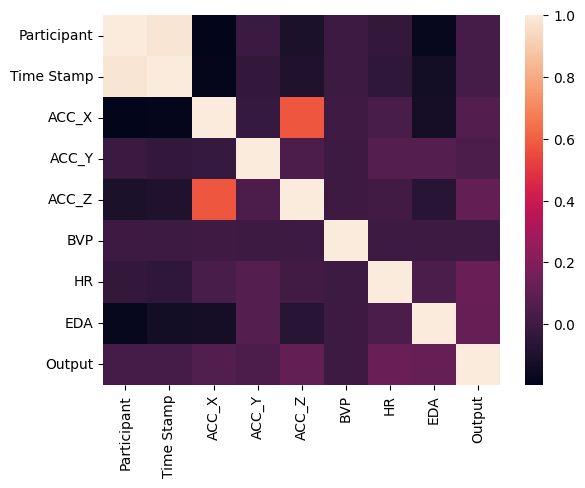

In [16]:

#correlation matrix
cormat = merged_df.corr()
#Plotting a heatmap
dataplot = sns.heatmap(cormat)

2. To compute a bar plot with the output column


0    77213
1    38487
Name: Output, dtype: int64


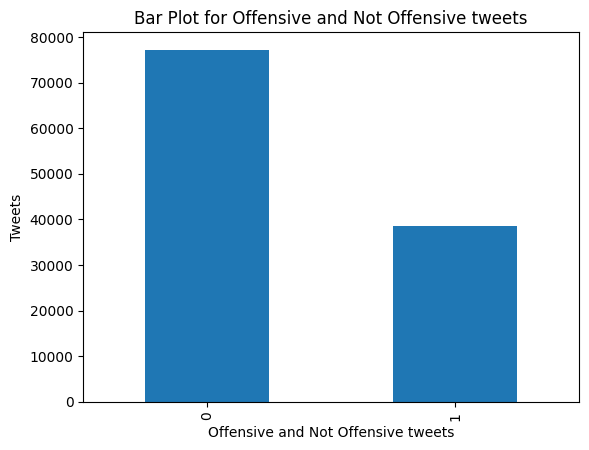

In [17]:
# Bar plot for output
x= merged_df['Output'].value_counts()
print(x)
x.plot(kind='bar')

# Add labels and title
plt.xlabel('Offensive and Not Offensive tweets')
plt.ylabel('Tweets')
plt.title('Bar Plot for Offensive and Not Offensive tweets')

# Display the plot
plt.show()

3. To compute a seaborn scatter plot

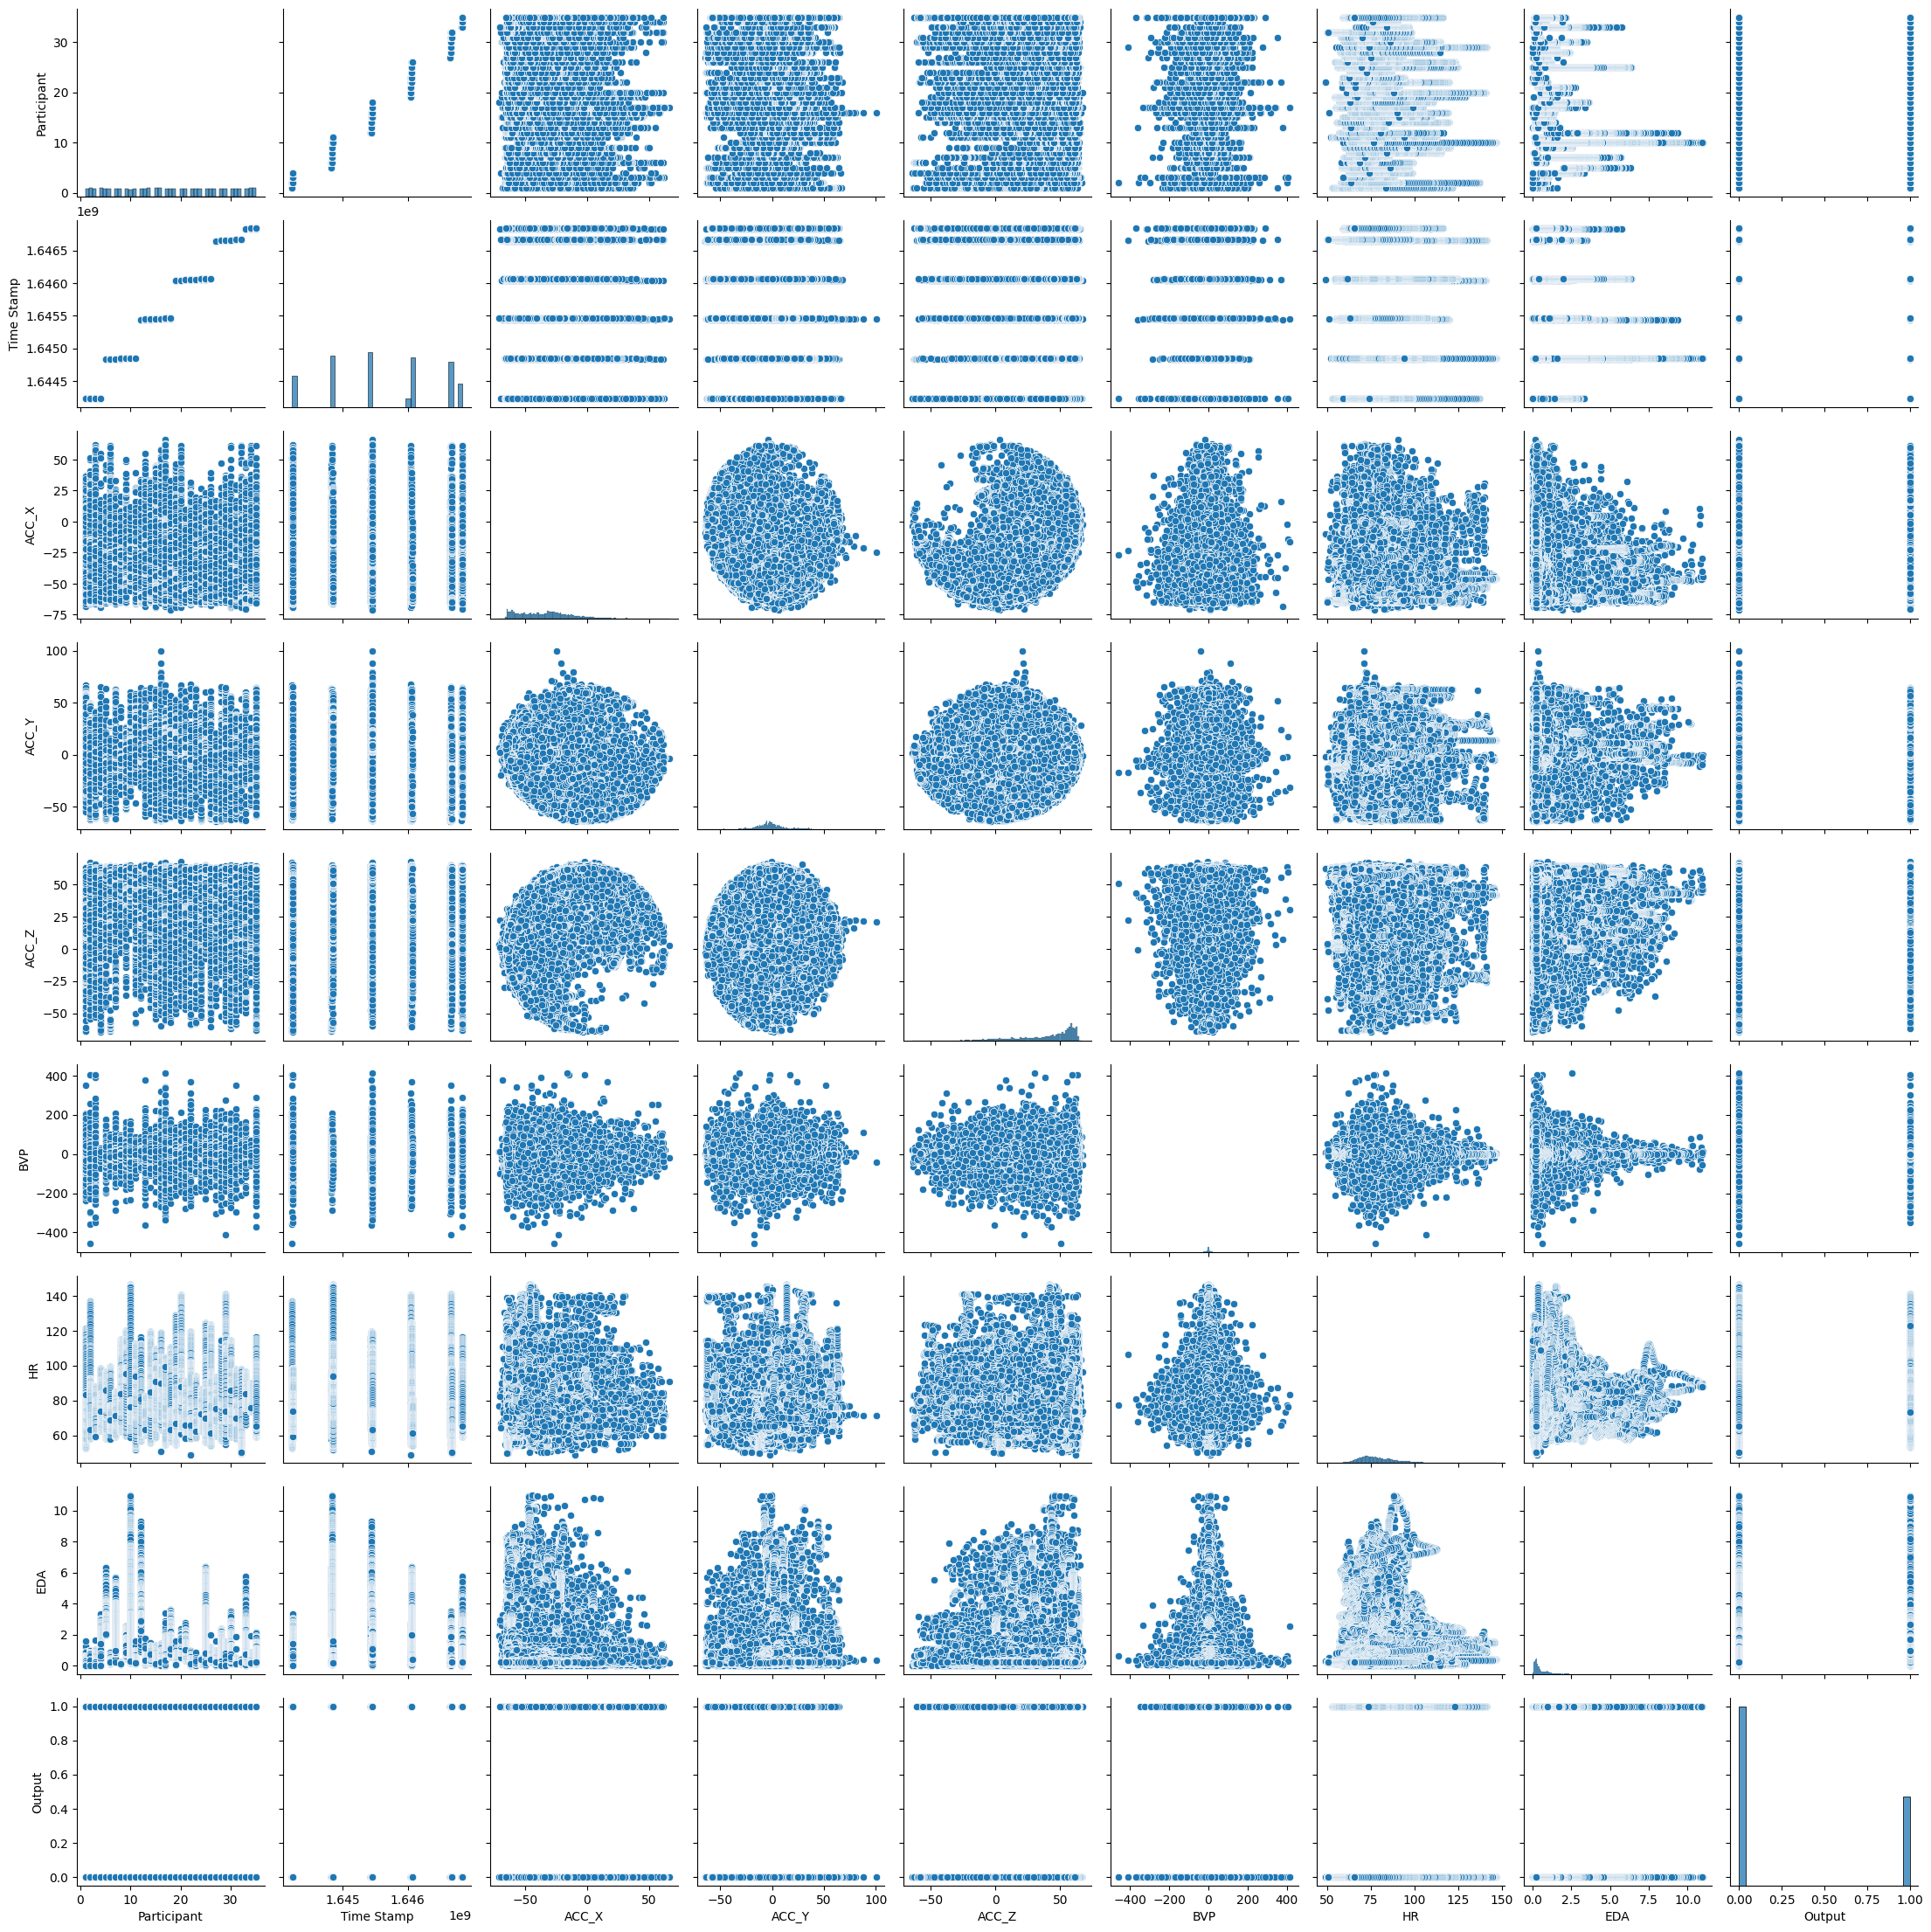

In [18]:
# Creating a pair plot  dataframe 'merged_df'
sns.pairplot(merged_df)

4. Time series plot

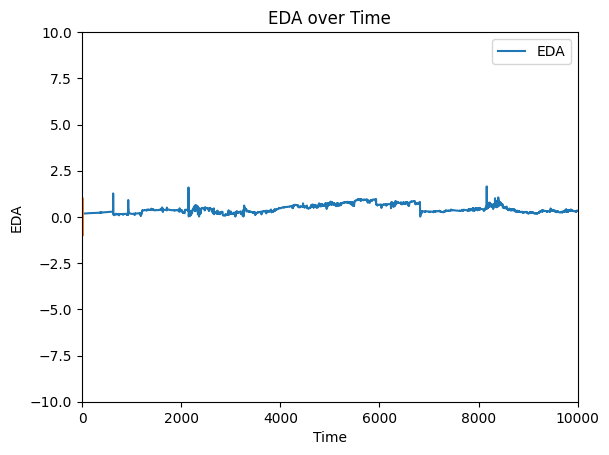

In [19]:
# Convert the date column to datetime format
timeSeries_data = merged_df.copy()
timeSeries_data['Time Stamp'] = pd.to_datetime(timeSeries_data['Time Stamp'])

 # Create a new figure and axis object
fig, ax = plt.subplots()  

# Define the columns to plot
cols_to_plot = ['EDA']

# Plot the selected columns against the time axis
timeSeries_data[cols_to_plot].plot(ax=ax)

plt.rcParams["figure.figsize"] = [7, 3]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-15, 15, 100)
y = np.sin(x)

#Plot the time series data
plt.plot(x, y)

plt.xlim(-10, 10000)
plt.ylim(-10, 10)

# Add a title and labels to the x and y axes
plt.title('EDA over Time')
plt.xlabel('Time')
plt.ylabel('EDA')
# Show the plot
plt.show()

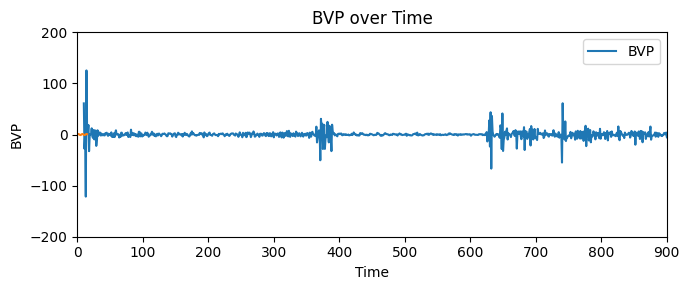

In [20]:
# Convert the 'Time Stamp'  to a datetime format
timeSeries_data['Time Stamp'] = pd.to_datetime(timeSeries_data['Time Stamp'])
fig, ax = plt.subplots()
cols_to_plot = ['BVP']
timeSeries_data[cols_to_plot].plot(ax=ax)

plt.rcParams["figure.figsize"] = [7, 3]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-15, 15, 100)
y = np.sin(x)

plt.plot(x, y)

#Set the x and y limit of plot
plt.xlim(0, 900)
plt.ylim(-200, 200)

# Add a title and labels to the x and y axes
plt.title('BVP over Time')
plt.xlabel('Time')
plt.ylabel('BVP')
# Show the plot
plt.show()

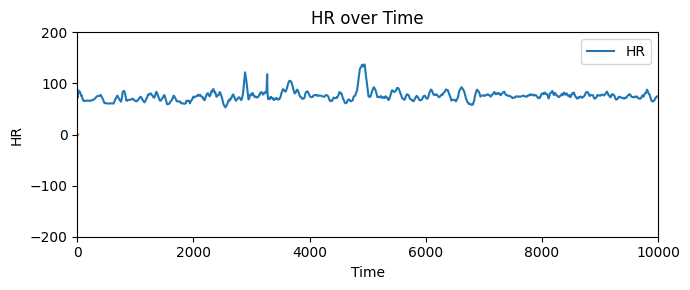

In [21]:
# Convert the 'Time Stamp' column to a datetime format
timeSeries_data['Time Stamp'] = pd.to_datetime(timeSeries_data['Time Stamp'])
fig, ax = plt.subplots()
cols_to_plot = ['HR']
timeSeries_data[cols_to_plot].plot(ax=ax)

# Setting the size and layout of the figure using the `rcParams` method of the `matplotlib.pyplot` module
plt.rcParams["figure.figsize"] = [7, 3]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-15, 15, 100)
y = np.sin(x)

plt.plot(x, y)

# Set the x and y limits of the plot
plt.xlim(0, 10000)
plt.ylim(-200, 200)

# Add a title and labels to the x and y axes
plt.title('HR over Time')
plt.xlabel('Time')
plt.ylabel('HR')
# Show the plot
plt.show()

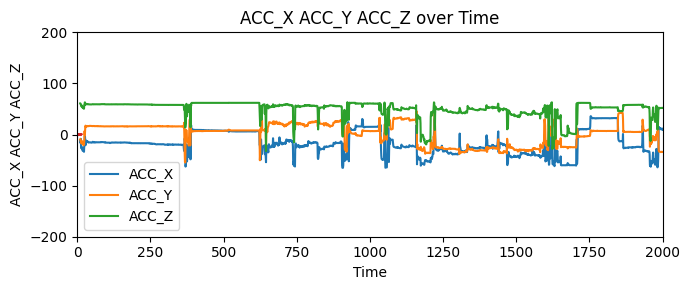

In [22]:
# Convert the 'Time Stamp' column to a datetime format
timeSeries_data['Time Stamp'] = pd.to_datetime(timeSeries_data['Time Stamp'])

# Create a new figure and axis object 
fig, ax = plt.subplots()
cols_to_plot = ['ACC_X','ACC_Y','ACC_Z']
timeSeries_data[cols_to_plot].plot(ax=ax)

plt.rcParams["figure.figsize"] = [7, 3]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-15, 15, 100)
y = np.sin(x)

plt.plot(x, y)

plt.xlim(0, 2000)
plt.ylim(-200, 200)

# Add a title and labels to the x and y axes
plt.title('ACC_X ACC_Y ACC_Z over Time')
plt.xlabel('Time')
plt.ylabel('ACC_X ACC_Y ACC_Z')
# Show the plot
plt.show()

# Building Data Model

In [23]:
# This function takes pandas DataFrame 'df' as input
def train_test(df):
    print(df.head())
    
    # Drop the 'Participant' column from the input dataframe 'df'
    df.drop('Participant', axis  = 1, inplace = True)
    
    # Creating a StandardScaler object 
    scaler = StandardScaler()
    x=df.drop(['Output'],axis=1)
    y=df['Output']
    
    # Splitting the data into training and testing sets using 'train_test_split' function from Scikit-learn library
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=13,shuffle = False)
    
    # Scaling the training and testing data 
    scaled_data_x_train = scaler.fit_transform(X_train)
    scaled_data_x_test = scaler.fit_transform(X_test)
    
    # Converting the scaled data arrays to pandas dataframes
    scaled_data_x_test = pd.DataFrame(scaled_data_x_test, columns = X_test.columns)
    scaled_data_x_train = pd.DataFrame(scaled_data_x_train, columns = X_train.columns)
    
     # Dropping the 'Time Stamp' from training and testing dataframes.
    scaled_data_x_train.drop('Time Stamp', axis  = 1, inplace = True)
    scaled_data_x_test.drop('Time Stamp', axis  = 1, inplace = True)
    
    
    #Calling the Random forest function
    score = random_forest(scaled_data_x_train,scaled_data_x_test,y_train,y_test)
    return score

In [24]:
def random_forest(x_train,x_test,y_train,y_test):
    
    # RandomForestClassifier is initialized
    C2 = RandomForestClassifier(max_depth=10,random_state=10)
    C2 = C2.fit(x_train,y_train) 
    
    # predicts the labels of the test data
    Y_pred2 = C2.predict(x_test)
    score = classific_report(Y_pred2,y_test)
    return scores

In [25]:
def classific_report(y_pred,y_test):
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    ##print("Precision:",metrics.precision_score(y_test, y_pred))
    #print("Recall:",metrics.recall_score(y_test, y_pred))
    #print("F1 score:",metrics.f1_score(y_test, y_pred))
    #Compute classification 
    classific_repo = classification_report(y_test,y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(classific_repo)
    print('Confusion Matrix', confusion_mat)
    
    #Display the confusion matrix as a plot
    cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
    cmd.plot()
    plt.show()
    return metrics.accuracy_score(y_test, y_pred)

    Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z         BVP  \
10            1  1.644226e+09 -13.65625  -9.40625  60.90625   60.935000   
11            1  1.644226e+09 -16.37500  -8.59375  60.71875  -27.887500   
12            1  1.644226e+09  -8.43750 -14.31250  59.53125   -2.248437   
13            1  1.644226e+09 -26.46875 -15.50000  56.09375 -121.485156   
14            1  1.644226e+09 -26.71875 -17.50000  54.96875  125.431250   

       HR       EDA  Output  
10  83.00  0.170087       0  
11  83.00  0.174251       0  
12  72.67  0.179375       0  
13  87.00  0.171048       0  
14  80.00  0.169126       0  
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1300
           1       0.00      0.00      0.00         0

    accuracy                           0.63      1300
   macro avg       0.50      0.31      0.39      1300
weighted avg       1.00      0.63      0.77      1300

Confusion Matrix [[818 482]
 [  0   0]]


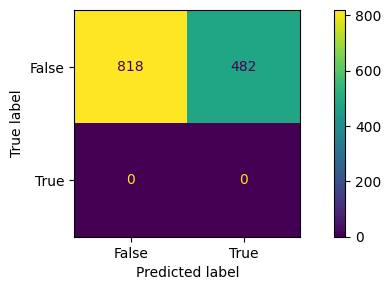

      Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
3270            2  1.644228e+09 -27.87500   7.34375  57.21875  10.017969   
3271            2  1.644228e+09 -30.96875  -2.90625  51.87500 -18.639062   
3272            2  1.644228e+09 -35.59375 -16.15625  34.96875  78.258906   
3273            2  1.644228e+09 -61.43750 -19.78125  -1.37500 -77.580156   
3274            2  1.644228e+09 -61.46875 -19.96875  -4.84375  40.660469   

          HR       EDA  Output  
3270  118.00  0.614382       0  
3271  113.50  0.592278       0  
3272   93.00  0.512189       0  
3273   93.25  0.475990       0  
3274   86.40  0.464137       0  
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1293
           1       0.00      0.01      0.00       129

    accuracy                           0.59      1422
   macro avg       0.44      0.33      0.37      1422
weighted avg       0.79      0.59      0.68      1422

Confusion Matrix [

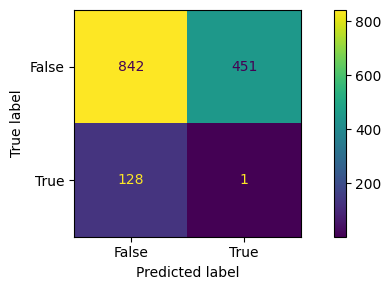

      Participant    Time Stamp    ACC_X     ACC_Y     ACC_Z        BVP  \
6835            3  1.644231e+09  7.34375  22.12500  59.21875   9.342969   
6836            3  1.644231e+09  7.59375  22.03125  59.50000 -12.137656   
6837            3  1.644231e+09  6.90625  22.21875  59.68750   6.244531   
6838            3  1.644231e+09  6.56250  23.12500  59.15625  16.827969   
6839            3  1.644231e+09  7.00000  23.03125  59.00000 -28.950625   

         HR       EDA  Output  
6835  67.00  0.197978       0  
6836  68.50  0.198938       0  
6837  68.33  0.198938       0  
6838  68.75  0.198618       0  
6839  69.00  0.199900       0  
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1201
           1       0.01      0.03      0.02       122

    accuracy                           0.64      1323
   macro avg       0.44      0.37      0.40      1323
weighted avg       0.80      0.64      0.71      1323

Confusion Matrix [[838 363]
 [

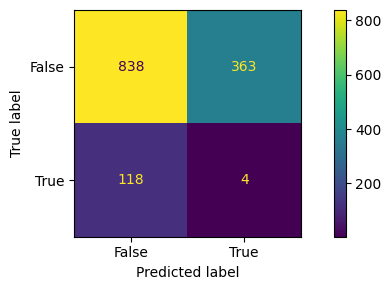

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
10154            4  1.644233e+09 -48.78125 -35.53125   3.09375  -9.179844   
10155            4  1.644233e+09 -57.59375 -29.06250  11.40625 -10.044375   
10156            4  1.644233e+09 -56.03125 -15.68750  21.50000   0.231719   
10157            4  1.644233e+09 -50.37500 -17.40625  33.15625   7.621094   
10158            4  1.644233e+09 -57.75000 -12.65625  25.12500  12.791406   

          HR       EDA  Output  
10154  83.00  1.080433       0  
10155  83.00  1.044238       0  
10156  75.33  1.029503       0  
10157  70.50  1.046800       0  
10158  67.40  1.078511       0  
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1314
           1       0.24      1.00      0.39        98

    accuracy                           0.79      1412
   macro avg       0.62      0.89      0.63      1412
weighted avg       0.95      0.79      0.84      1412

Confusion Ma

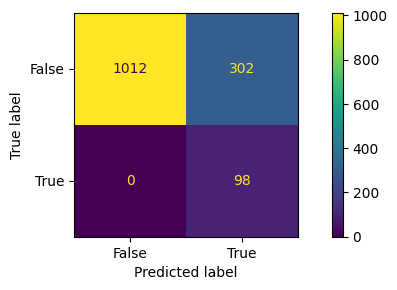

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
13693            5  1.644830e+09  -6.40625 -13.03125  61.21875 -15.576563   
13694            5  1.644830e+09 -24.18750  -5.81250  58.62500  71.620312   
13695            5  1.644830e+09 -36.43750  -5.56250  46.68750  16.955938   
13696            5  1.644830e+09 -56.15625  -4.28125  31.96875 -52.328750   
13697            5  1.644830e+09 -24.28125   0.12500  54.65625 -11.277656   

          HR       EDA  Output  
13693  85.00  3.801839       0  
13694  84.00  3.825223       0  
13695  84.33  3.807925       0  
13696  77.00  3.849569       0  
13697  76.20  3.866547       0  
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1187
           1       0.03      0.06      0.04       120

    accuracy                           0.71      1307
   macro avg       0.46      0.42      0.43      1307
weighted avg       0.81      0.71      0.76      1307

Confusion Ma

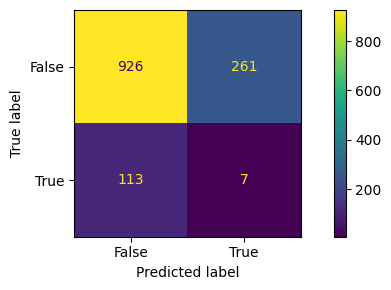

       Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z       BVP     HR  \
16972            6  1.644832e+09 -4.62500 -1.25000 -62.68750 -4.199531  58.00   
16973            6  1.644832e+09 -4.53125 -1.50000 -62.68750 -0.216406  61.00   
16974            6  1.644832e+09 -4.50000 -1.34375 -62.81250  5.656250  61.67   
16975            6  1.644832e+09 -4.71875 -1.43750 -62.65625  2.917813  62.75   
16976            6  1.644832e+09 -5.06250 -1.46875 -62.68750 -1.388594  63.40   

            EDA  Output  
16972  0.143189       0  
16973  0.142548       0  
16974  0.142869       0  
16975  0.140626       0  
16976  0.140946       0  
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       754
           1       0.64      0.22      0.33       568

    accuracy                           0.61      1322
   macro avg       0.62      0.56      0.53      1322
weighted avg       0.62      0.61      0.55      1322

Confusion Matrix [[684  70]
 [

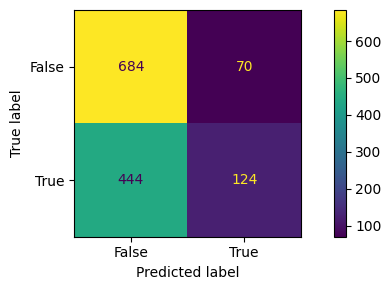

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
20291            7  1.644835e+09 -50.59375  3.25000  39.15625 -24.305937   
20292            7  1.644835e+09 -50.75000  3.18750  38.87500 -14.073594   
20293            7  1.644835e+09 -51.03125  3.09375  38.84375   5.551562   
20294            7  1.644835e+09 -51.81250  3.18750  37.78125 -18.759844   
20295            7  1.644835e+09 -51.34375  3.21875  38.25000 -96.899844   

          HR       EDA  Output  
20291  60.00  0.344337       0  
20292  72.50  0.342415       0  
20293  72.00  0.343056       0  
20294  71.75  0.339212       0  
20295  71.80  0.337610       0  
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1209
           1       0.03      0.04      0.03       139

    accuracy                           0.73      1348
   macro avg       0.45      0.43      0.44      1348
weighted avg       0.79      0.73      0.76      1348

Confusion Matrix [

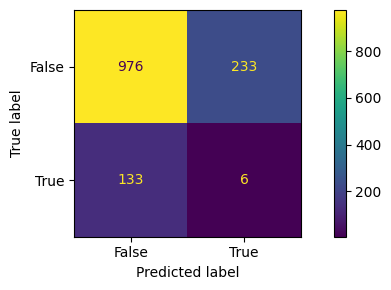

       Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z       BVP     HR  \
23672            8  1.644841e+09 -13.0000 -2.00000  62.00000 -5.154687  84.00   
23673            8  1.644841e+09 -13.0000 -2.00000  62.00000  4.349531  84.00   
23674            8  1.644841e+09 -13.0625 -2.06250  62.00000 -1.566563  84.33   
23675            8  1.644841e+09 -13.6250 -2.21875  61.96875  2.216406  84.75   
23676            8  1.644841e+09 -13.8750 -2.25000  62.03125 -1.695312  86.40   

            EDA  Output  
23672  0.105389       0  
23673  0.104429       0  
23674  0.104749       0  
23675  0.105389       0  
23676  0.104749       0  
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1143
           1       0.19      0.96      0.32       111

    accuracy                           0.64      1254
   macro avg       0.59      0.79      0.54      1254
weighted avg       0.92      0.64      0.71      1254

Confusion Matrix [[693 450]
 [

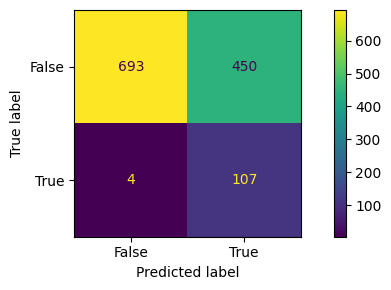

       Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z       BVP     HR  \
26815            9  1.644842e+09 -2.06250 -1.90625  64.00000  1.443125  103.0   
26816            9  1.644842e+09 -2.09375 -1.96875  63.93750 -0.880938  113.5   
26817            9  1.644842e+09 -2.06250 -1.84375  63.96875 -1.387500  109.0   
26818            9  1.644842e+09 -2.06250 -1.90625  64.00000  1.342656   95.5   
26819            9  1.644842e+09 -2.03125 -1.90625  63.96875 -1.446875   95.0   

            EDA  Output  
26815  0.578841       0  
26816  0.578521       0  
26817  0.579162       0  
26818  0.580763       0  
26819  0.584287       0  
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      1132
           1       0.22      0.79      0.35       139

    accuracy                           0.68      1271
   macro avg       0.59      0.73      0.57      1271
weighted avg       0.88      0.68      0.74      1271

Confusion Matrix [[753 379]
 [

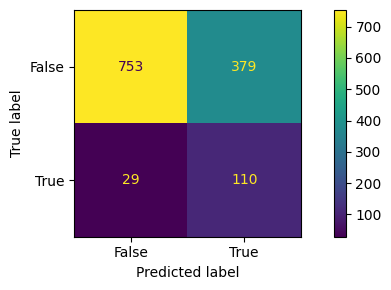

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
30001           10  1.644844e+09 -31.28125  37.18750  42.15625 -13.580469   
30002           10  1.644844e+09 -28.90625  18.56250  51.84375  21.090781   
30003           10  1.644844e+09  -1.03125   9.28125  61.68750 -25.675781   
30004           10  1.644844e+09   0.87500   6.78125  62.65625  89.463750   
30005           10  1.644844e+09  -4.84375   0.25000  62.50000 -62.077188   

          HR       EDA  Output  
30001  85.00  0.206282       0  
30002  71.50  0.208844       0  
30003  75.33  0.210766       0  
30004  71.50  0.212047       0  
30005  68.20  0.214289       0  
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1080
           1       0.06      0.13      0.08       132

    accuracy                           0.69      1212
   macro avg       0.47      0.44      0.45      1212
weighted avg       0.79      0.69      0.73      1212

Confusion Ma

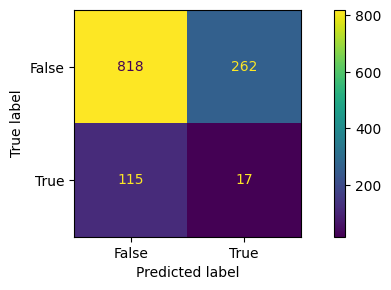

       Participant    Time Stamp     ACC_X     ACC_Y    ACC_Z       BVP  \
33039           11  1.644852e+09 -20.62500  26.90625  53.7500  6.974844   
33040           11  1.644852e+09 -19.56250  27.75000  53.8750 -7.026875   
33041           11  1.644852e+09 -17.53125  27.90625  54.1250  7.142344   
33042           11  1.644852e+09 -17.53125  27.78125  54.1250  3.758125   
33043           11  1.644852e+09 -18.06250  26.56250  54.8125 -9.582656   

          HR       EDA  Output  
33039  52.00  0.176493       0  
33040  56.00  0.176493       0  
33041  55.67  0.177454       0  
33042  55.75  0.176172       0  
33043  57.40  0.177133       0  
              precision    recall  f1-score   support

           0       0.97      0.55      0.70      1156
           1       0.20      0.85      0.32       152

    accuracy                           0.59      1308
   macro avg       0.58      0.70      0.51      1308
weighted avg       0.88      0.59      0.66      1308

Confusion Matrix [[639 5

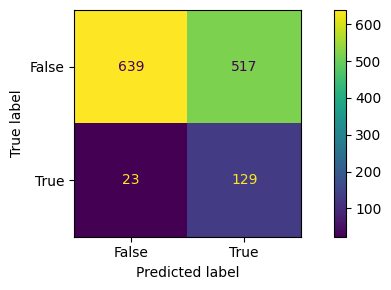

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
36318           12  1.645435e+09 -34.68750  29.84375  46.31250  10.494375   
36319           12  1.645435e+09 -35.78125  29.18750  45.93750  -4.615000   
36320           12  1.645435e+09 -36.65625  28.87500  45.43750  -4.462500   
36321           12  1.645435e+09 -36.59375  29.09375  45.06250  -4.880469   
36322           12  1.645435e+09 -36.62500  29.18750  45.03125  -0.609531   

          HR       EDA  Output  
36318  83.00  1.006804       0  
36319  69.00  1.019301       0  
36320  66.00  1.046538       0  
36321  67.75  1.059675       0  
36322  64.00  1.049742       0  
              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1207
           1       0.01      0.06      0.02       126

    accuracy                           0.49      1333
   macro avg       0.43      0.30      0.34      1333
weighted avg       0.77      0.49      0.60      1333

Confusion Ma

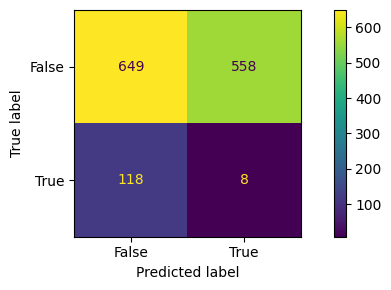

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z         BVP  \
39660           13  1.645443e+09 -18.65625   5.93750  61.75000   -2.677969   
39661           13  1.645443e+09 -20.09375 -12.06250  54.90625   -7.656406   
39662           13  1.645443e+09  -6.65625 -46.12500  44.25000  -36.992969   
39663           13  1.645443e+09   3.62500 -49.93750  37.93750  -76.609062   
39664           13  1.645443e+09   9.46875 -49.46875  35.46875  117.024844   

         HR       EDA  Output  
39660  73.0  0.070815       0  
39661  64.0  0.069213       0  
39662  63.0  0.065047       0  
39663  68.5  0.063445       0  
39664  71.8  0.058959       0  
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1217
           1       0.17      0.97      0.29       117

    accuracy                           0.59      1334
   macro avg       0.58      0.76      0.50      1334
weighted avg       0.92      0.59      0.67      1334

Confusion Ma

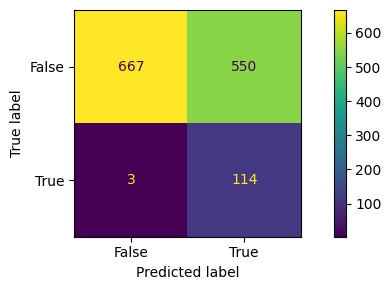

       Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z        BVP  \
43007           14  1.645444e+09 -7.09375  1.00000  63.43750  -0.972500   
43008           14  1.645444e+09 -7.87500  0.25000  63.28125  10.958906   
43009           14  1.645444e+09 -8.37500  0.37500  63.34375  -4.856406   
43010           14  1.645444e+09 -8.50000  0.37500  63.28125   1.835156   
43011           14  1.645444e+09 -8.65625  0.46875  63.25000  -0.597656   

           HR       EDA  Output  
43007   63.00  0.292161       0  
43008   80.50  0.285114       0  
43009   81.33  0.284473       0  
43010   81.75  0.293122       0  
43011  104.40  0.294404       0  
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1290
           1       0.14      0.64      0.23       137

    accuracy                           0.59      1427
   macro avg       0.54      0.61      0.47      1427
weighted avg       0.86      0.59      0.67      1427

Confusion Matrix [

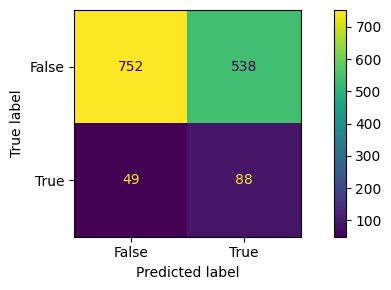

       Participant    Time Stamp     ACC_X     ACC_Y    ACC_Z       BVP    HR  \
46583           15  1.645447e+09  -5.81250  10.50000  61.8750 -0.148125  85.0   
46584           15  1.645447e+09  -4.90625   7.09375  62.3125  4.874375  80.0   
46585           15  1.645447e+09 -27.68750  19.93750  52.6875  1.031406  87.0   
46586           15  1.645447e+09 -29.84375  23.15625  51.1875  4.822031  91.0   
46587           15  1.645447e+09 -30.59375  22.87500  51.0625 -3.252031  84.4   

            EDA  Output  
46583  0.270665       0  
46584  0.269063       0  
46585  0.267142       0  
46586  0.264259       0  
46587  0.263297       0  
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1225
           1       0.06      0.13      0.08       155

    accuracy                           0.66      1380
   macro avg       0.46      0.43      0.44      1380
weighted avg       0.78      0.66      0.71      1380

Confusion Matrix [[891 334]
 [

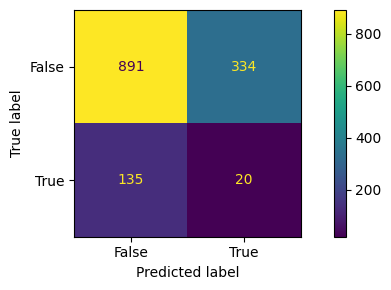

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z         BVP  \
50042           16  1.645449e+09 -29.37500  1.96875  56.40625  -12.977969   
50043           16  1.645449e+09 -37.28125 -7.37500  51.71875   23.578906   
50044           16  1.645449e+09 -37.53125 -6.15625  51.68750  -63.938437   
50045           16  1.645449e+09 -36.75000 -4.93750  52.37500  -25.159375   
50046           16  1.645449e+09 -35.50000 -2.53125  53.18750  106.869844   

          HR       EDA  Output  
50042  51.00  0.509916       0  
50043  63.50  0.505752       0  
50044  75.00  0.509276       0  
50045  72.25  0.504151       0  
50046  70.60  0.513760       0  
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      1254
           1       0.17      0.74      0.27       121

    accuracy                           0.65      1375
   macro avg       0.56      0.69      0.52      1375
weighted avg       0.89      0.65      0.72      1375

Confusion Ma

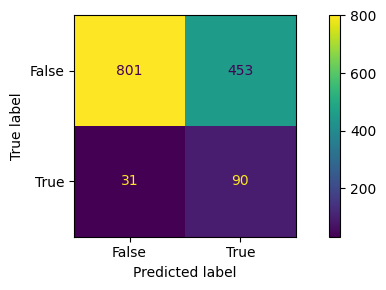

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
53488           17  1.645456e+09 -38.93750  0.75000  50.90625   6.072344   
53489           17  1.645456e+09 -38.12500  0.43750  51.71875  -3.786094   
53490           17  1.645456e+09 -38.06250 -0.18750  51.75000  -5.518438   
53491           17  1.645456e+09 -38.53125  0.00000  51.37500  14.255156   
53492           17  1.645456e+09 -38.93750  0.03125  51.09375 -14.330156   

         HR       EDA  Output  
53488  83.0  0.151517       0  
53489  78.0  0.154400       0  
53490  71.0  0.155041       0  
53491  68.0  0.155361       0  
53492  66.0  0.155361       0  
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1225
           1       0.04      0.04      0.04        95

    accuracy                           0.86      1320
   macro avg       0.48      0.48      0.48      1320
weighted avg       0.86      0.86      0.86      1320

Confusion Matrix [[1135 

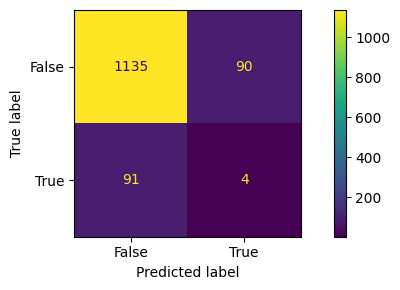

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z       BVP  \
56800           18  1.645458e+09 -28.96875  3.96875  57.96875 -8.536094   
56801           18  1.645458e+09 -28.87500  4.03125  58.00000 -0.478594   
56802           18  1.645458e+09 -28.93750  4.12500  58.00000 -0.723750   
56803           18  1.645458e+09 -28.93750  4.06250  58.00000  2.798281   
56804           18  1.645458e+09 -28.87500  4.09375  58.00000  1.750938   

          HR       EDA  Output  
56800  58.00  0.614278       1  
56801  58.00  0.617803       1  
56802  58.67  0.614920       1  
56803  59.25  0.610113       1  
56804  64.00  0.608511       1  
              precision    recall  f1-score   support

           0       0.76      0.14      0.23      1244
           1       0.06      0.56      0.11       120

    accuracy                           0.17      1364
   macro avg       0.41      0.35      0.17      1364
weighted avg       0.70      0.17      0.22      1364

Confusion Matrix [[ 170 

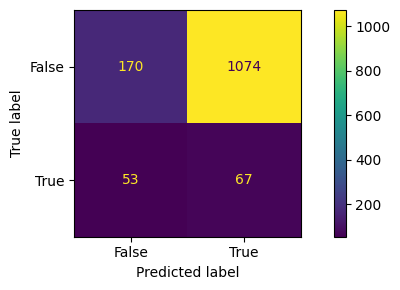

       Participant    Time Stamp    ACC_X     ACC_Y     ACC_Z        BVP  \
60222           19  1.646040e+09 -39.0625   1.28125  50.40625   3.155000   
60223           19  1.646040e+09 -40.0625   0.84375  49.90625  13.587813   
60224           19  1.646040e+09 -40.4375   0.43750  49.46875   8.327656   
60225           19  1.646040e+09 -43.3125  -4.71875  50.75000   2.386094   
60226           19  1.646040e+09 -21.5000 -50.50000  19.53125 -31.371250   

          HR       EDA  Output  
60222  90.00  0.115954       0  
60223  82.50  0.117235       0  
60224  80.33  0.117555       0  
60225  81.00  0.117235       0  
60226  76.60  0.108907       0  
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1179
           1       0.12      0.47      0.19        95

    accuracy                           0.70      1274
   macro avg       0.53      0.60      0.50      1274
weighted avg       0.88      0.70      0.77      1274

Confusion Matrix [

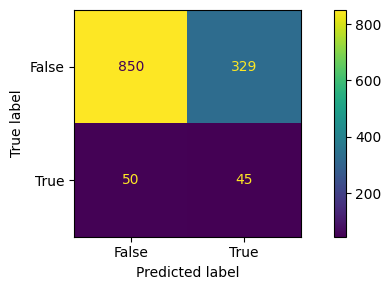

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z        BVP  \
63416           20  1.646042e+09 -50.81250 -27.50000  28.40625 -17.360781   
63417           20  1.646042e+09 -49.03125 -27.96875  31.00000  16.221094   
63418           20  1.646042e+09 -48.96875 -27.84375  31.21875  -4.653750   
63419           20  1.646042e+09 -49.62500 -27.96875  30.03125  -2.157812   
63420           20  1.646042e+09 -48.87500 -29.03125  29.93750  -5.632812   

          HR       EDA  Output  
63416  61.00  0.623314       0  
63417  68.00  0.616267       0  
63418  81.67  0.613063       0  
63419  81.75  0.607938       0  
63420  82.00  0.604414       0  
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1249
           1       0.08      0.41      0.13       106

    accuracy                           0.57      1355
   macro avg       0.50      0.49      0.42      1355
weighted avg       0.85      0.57      0.67      1355

Confusion Ma

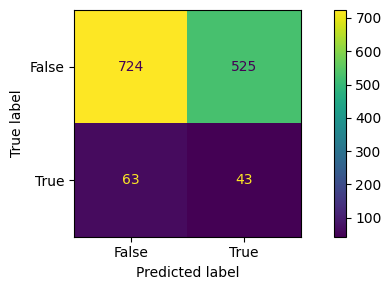

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
66812           21  1.646049e+09 -40.37500 -8.71875  49.06250  44.433750   
66813           21  1.646049e+09 -40.96875 -9.03125  48.00000  15.152188   
66814           21  1.646049e+09 -46.93750 -7.53125  43.40625 -24.150937   
66815           21  1.646049e+09 -47.96875 -8.34375  41.56250   7.443125   
66816           21  1.646049e+09 -61.90625 -6.46875  15.09375  59.234219   

         HR       EDA  Output  
66812  59.0  0.813661       0  
66813  58.5  0.811098       0  
66814  80.0  0.801808       0  
66815  84.5  0.800207       0  
66816  82.4  0.768494       0  
              precision    recall  f1-score   support

           0       0.92      0.47      0.62      1125
           1       0.16      0.72      0.27       162

    accuracy                           0.50      1287
   macro avg       0.54      0.59      0.44      1287
weighted avg       0.83      0.50      0.57      1287

Confusion Matrix [[524 6

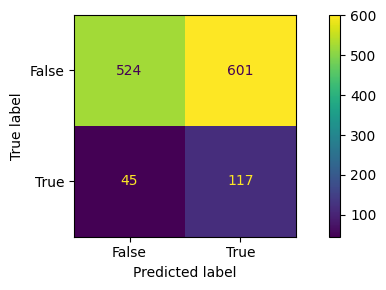

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
70040           22  1.646051e+09  -9.75000 -2.21875  62.31250   5.902500   
70041           22  1.646051e+09  -9.78125 -2.06250  62.12500   8.710469   
70042           22  1.646051e+09  -9.78125 -2.09375  62.21875  -0.599531   
70043           22  1.646051e+09 -20.15625 -2.21875  59.90625 -11.046250   
70044           22  1.646051e+09 -23.78125 -1.25000  58.65625  50.610469   

          HR       EDA  Output  
70040  49.00  0.287321       0  
70041  49.00  0.288923       0  
70042  65.33  0.289243       0  
70043  74.00  0.283157       0  
70044  71.20  0.286681       0  
              precision    recall  f1-score   support

           0       0.79      0.43      0.56      1080
           1       0.03      0.11      0.04       142

    accuracy                           0.40      1222
   macro avg       0.41      0.27      0.30      1222
weighted avg       0.70      0.40      0.50      1222

Confusion Matrix [

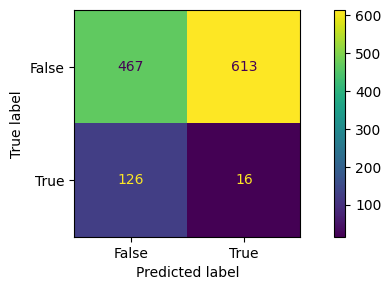

       Participant    Time Stamp     ACC_X     ACC_Y    ACC_Z       BVP  \
73104           23  1.646052e+09 -62.40625  11.25000 -13.8125 -0.734688   
73105           23  1.646052e+09 -62.31250  10.84375 -14.3750  2.288906   
73106           23  1.646052e+09 -62.34375  10.90625 -13.8750 -4.437812   
73107           23  1.646052e+09 -62.43750  11.00000 -13.9375  1.809375   
73108           23  1.646052e+09 -62.31250  11.06250 -13.8750  2.101719   

          HR       EDA  Output  
73104  79.00  0.053496       0  
73105  68.50  0.052855       0  
73106  65.00  0.053496       0  
73107  73.25  0.052855       0  
73108  70.60  0.053176       0  
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1080
           1       0.26      0.84      0.40       152

    accuracy                           0.69      1232
   macro avg       0.61      0.75      0.59      1232
weighted avg       0.88      0.69      0.74      1232

Confusion Matrix [[721 3

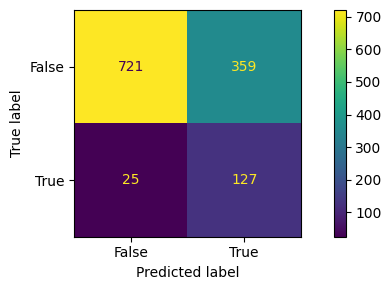

       Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z       BVP  \
76193           24  1.646059e+09 -30.78125 -13.90625  54.00000 -4.848750   
76194           24  1.646059e+09 -30.40625 -13.71875  54.06250 -7.152813   
76195           24  1.646059e+09 -30.50000 -13.65625  54.06250  1.120469   
76196           24  1.646059e+09 -30.46875 -13.90625  54.06250  5.314062   
76197           24  1.646059e+09 -30.43750 -13.84375  54.15625  1.974531   

          HR       EDA  Output  
76193  85.00  0.123321       0  
76194  74.50  0.124602       0  
76195  70.33  0.125243       0  
76196  68.50  0.124602       0  
76197  67.60  0.125243       0  
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1171
           1       0.01      0.02      0.01       137

    accuracy                           0.66      1308
   macro avg       0.44      0.38      0.40      1308
weighted avg       0.78      0.66      0.71      1308

Confusion Matrix [

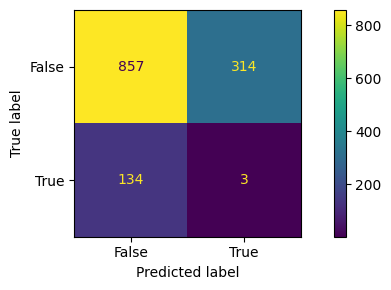

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
79471           25  1.646061e+09 -14.09375 -5.09375  62.15625   5.327656   
79472           25  1.646061e+09 -14.21875 -5.00000  61.71875 -13.246406   
79473           25  1.646061e+09  -0.68750  5.15625  65.25000 -12.830156   
79474           25  1.646061e+09  -0.25000  5.00000  64.12500  11.414062   
79475           25  1.646061e+09  -1.06250  4.93750  64.09375 -17.824844   

           HR       EDA  Output  
79471  109.00  0.041015       0  
79472   83.50  0.041015       0  
79473   88.33  0.041976       0  
79474   87.00  0.044539       0  
79475   89.20  0.046142       0  
              precision    recall  f1-score   support

           0       0.93      0.46      0.62      1194
           1       0.06      0.50      0.11        88

    accuracy                           0.47      1282
   macro avg       0.50      0.48      0.37      1282
weighted avg       0.87      0.47      0.58      1282

Confusion Ma

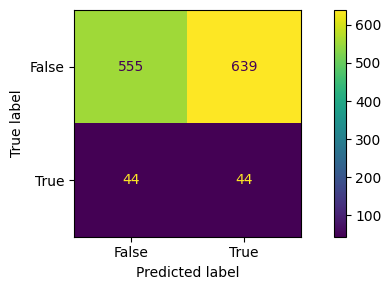

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
82685           26  1.646063e+09 -26.81250  6.68750  57.53125  -1.935625   
82686           26  1.646063e+09 -29.90625  6.15625  56.18750   4.785625   
82687           26  1.646063e+09 -32.12500  8.59375  54.84375 -32.835156   
82688           26  1.646063e+09 -31.25000  9.06250  55.28125   8.922031   
82689           26  1.646063e+09 -30.37500  9.34375  55.68750  -8.797031   

          HR       EDA  Output  
82685  68.00  0.280291       0  
82686  78.00  0.280611       0  
82687  73.67  0.279650       0  
82688  71.25  0.278369       0  
82689  69.80  0.281252       0  
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1164
           1       0.32      0.45      0.37       128

    accuracy                           0.85      1292
   macro avg       0.63      0.67      0.64      1292
weighted avg       0.87      0.85      0.86      1292

Confusion Matrix [

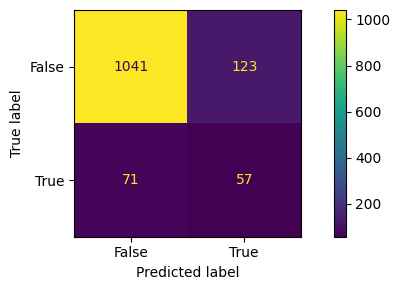

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
85925           27  1.646646e+09 -16.90625  2.68750  61.03125  15.750469   
85926           27  1.646646e+09 -17.78125  2.75000  60.90625   0.740156   
85927           27  1.646646e+09 -19.28125  2.68750  60.18750  -0.750781   
85928           27  1.646646e+09 -20.12500  2.84375  60.00000  -4.003750   
85929           27  1.646646e+09 -20.71875  2.15625  59.96875  -1.403281   

         HR       EDA  Output  
85925  73.0  0.266501       0  
85926  79.0  0.266181       0  
85927  77.0  0.266501       0  
85928  72.5  0.265540       0  
85929  69.8  0.266180       0  
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1232
           1       0.19      0.79      0.31       116

    accuracy                           0.69      1348
   macro avg       0.58      0.74      0.55      1348
weighted avg       0.90      0.69      0.76      1348

Confusion Matrix [[838 3

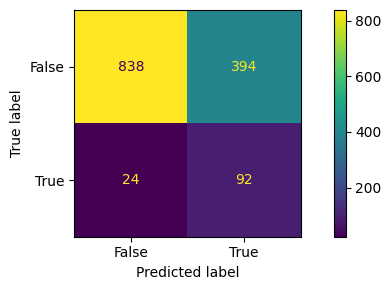

       Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z       BVP     HR  \
89304           28  1.646655e+09 -13.5625 -3.18750  62.03125  2.961250  67.00   
89305           28  1.646655e+09 -14.4375  2.59375  62.00000  0.186563  75.00   
89306           28  1.646655e+09 -14.0625  6.56250  61.43750 -2.453906  67.33   
89307           28  1.646655e+09 -15.0625  1.87500  62.12500  0.660938  64.25   
89308           28  1.646655e+09 -17.1875 -0.59375  61.50000 -2.411719  62.40   

            EDA  Output  
89304  0.062144       0  
89305  0.062144       0  
89306  0.062144       0  
89307  0.063746       0  
89308  0.063746       0  
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1191
           1       0.18      0.66      0.28       128

    accuracy                           0.68      1319
   macro avg       0.56      0.67      0.54      1319
weighted avg       0.87      0.68      0.74      1319

Confusion Matrix [[807 384]
 [

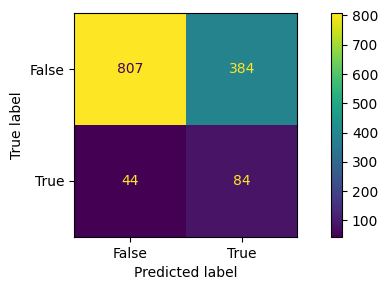

       Participant    Time Stamp    ACC_X     ACC_Y     ACC_Z        BVP  \
92612           29  1.646657e+09 -6.93750  39.06250  50.62500  35.058594   
92613           29  1.646657e+09 -6.90625  39.03125  50.46875 -23.158750   
92614           29  1.646657e+09 -6.93750  39.06250  50.37500 -10.306250   
92615           29  1.646657e+09 -6.93750  39.12500  50.43750  52.271563   
92616           29  1.646657e+09 -6.87500  39.03125  50.43750 -25.162344   

          HR       EDA  Output  
92612  55.00  0.833132       0  
92613  56.50  0.833452       0  
92614  56.67  0.838577       0  
92615  57.75  0.848829       0  
92616  59.60  0.854594       0  
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      1197
           1       0.36      0.96      0.52       117

    accuracy                           0.84      1314
   macro avg       0.68      0.89      0.71      1314
weighted avg       0.94      0.84      0.87      1314

Confusion Matrix [

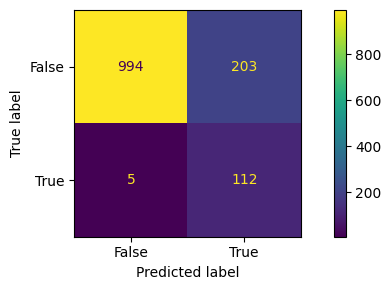

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
95906           30  1.646658e+09 -63.90625   7.1250   8.93750 -56.042344   
95907           30  1.646658e+09 -51.09375   9.0625  27.96875  35.296094   
95908           30  1.646658e+09   9.40625  10.5000  58.93750  -3.596094   
95909           30  1.646658e+09 -25.21875  12.8750  34.93750  10.251094   
95910           30  1.646658e+09 -58.53125   6.8125   6.37500 -23.610781   

         HR       EDA  Output  
95906  83.0  0.224621       1  
95907  83.0  0.227825       1  
95908  72.0  0.253460       1  
95909  66.5  0.244167       1  
95910  62.8  0.231029       1  
              precision    recall  f1-score   support

           0       0.91      0.22      0.36      1205
           1       0.10      0.79      0.17       125

    accuracy                           0.28      1330
   macro avg       0.50      0.51      0.26      1330
weighted avg       0.83      0.28      0.34      1330

Confusion Matrix [[267 9

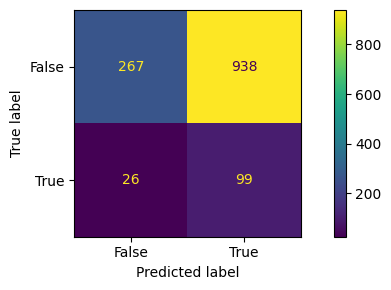

       Participant    Time Stamp     ACC_X    ACC_Y     ACC_Z        BVP  \
99243           31  1.646666e+09 -17.28125 -1.93750  61.00000   8.947500   
99244           31  1.646666e+09 -17.03125 -2.00000  61.00000  -9.863750   
99245           31  1.646666e+09 -17.03125 -1.90625  61.00000  17.827344   
99246           31  1.646666e+09 -17.09375 -1.71875  60.96875   4.174688   
99247           31  1.646666e+09 -17.37500 -1.62500  60.96875 -10.187344   

          HR       EDA  Output  
99243  88.00  0.125243       0  
99244  79.50  0.125563       0  
99245  72.33  0.125883       0  
99246  71.75  0.125883       0  
99247  67.00  0.126844       0  
              precision    recall  f1-score   support

           0       0.93      0.52      0.67      1211
           1       0.10      0.57      0.17       108

    accuracy                           0.52      1319
   macro avg       0.51      0.55      0.42      1319
weighted avg       0.86      0.52      0.63      1319

Confusion Matrix [

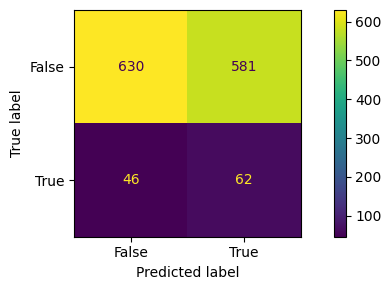

        Participant    Time Stamp    ACC_X    ACC_Y     ACC_Z       BVP    HR  \
102550           32  1.646667e+09 -28.5000 -3.65625  57.09375 -0.839688  56.0   
102551           32  1.646667e+09 -28.3125 -3.40625  57.00000 -2.050781  56.0   
102552           32  1.646667e+09 -29.1250 -4.93750  56.84375 -3.725781  55.0   
102553           32  1.646667e+09 -29.0000 -5.00000  56.93750 -3.517187  54.5   
102554           32  1.646667e+09 -29.0000 -5.00000  57.00000 -1.368125  54.2   

             EDA  Output  
102550  0.148314       0  
102551  0.147673       0  
102552  0.148634       0  
102553  0.149916       0  
102554  0.149275       0  
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      1165
           1       0.00      0.00      0.00       115

    accuracy                           0.52      1280
   macro avg       0.43      0.29      0.34      1280
weighted avg       0.78      0.52      0.63      1280

Confusion Matrix [[670 4

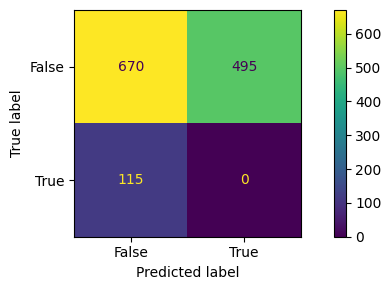

        Participant    Time Stamp     ACC_X    ACC_Y  ACC_Z       BVP     HR  \
105759           33  1.646828e+09 -52.03125  1.00000   38.0  0.627969  66.00   
105760           33  1.646828e+09 -52.00000  0.96875   38.0  0.286250  66.50   
105761           33  1.646828e+09 -52.03125  1.00000   38.0  0.482656  67.33   
105762           33  1.646828e+09 -52.03125  1.00000   38.0  5.200469  67.75   
105763           33  1.646828e+09 -52.00000  1.00000   38.0 -6.577031  69.20   

             EDA  Output  
105759  0.220709       0  
105760  0.221670       0  
105761  0.221991       0  
105762  0.220709       0  
105763  0.221991       0  
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      1121
           1       0.24      0.99      0.39       170

    accuracy                           0.60      1291
   macro avg       0.62      0.76      0.55      1291
weighted avg       0.90      0.60      0.66      1291

Confusion Matrix [[602 519]
 [

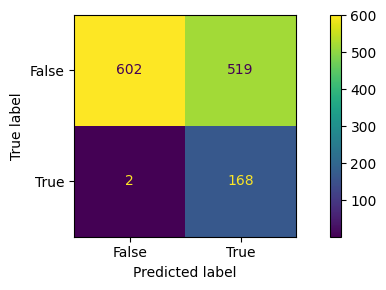

        Participant    Time Stamp    ACC_X  ACC_Y     ACC_Z        BVP    HR  \
108995           34  1.646837e+09 -3.03125   -5.0  63.34375 -10.303906  78.0   
108996           34  1.646837e+09 -3.03125   -5.0  63.28125   3.309687  78.0   
108997           34  1.646837e+09 -3.15625   -5.0  63.28125  -3.197031  78.0   
108998           34  1.646837e+09 -3.31250   -5.0  63.37500   4.816094  78.0   
108999           34  1.646837e+09 -3.15625   -5.0  63.21875  -3.834375  79.0   

             EDA  Output  
108995  0.157924       0  
108996  0.158565       0  
108997  0.158565       0  
108998  0.159526       0  
108999  0.160487       0  
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1261
           1       0.43      0.98      0.60       163

    accuracy                           0.85      1424
   macro avg       0.72      0.91      0.76      1424
weighted avg       0.93      0.85      0.87      1424

Confusion Matrix [[1054  207]


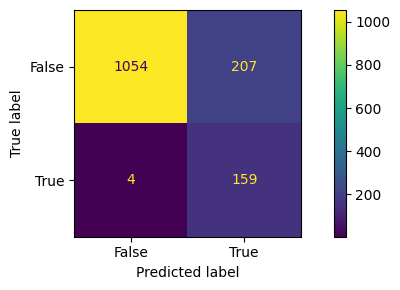

        Participant    Time Stamp     ACC_X     ACC_Y     ACC_Z         BVP  \
112565           35  1.646839e+09 -29.12500  -7.81250 -14.78125  -41.115937   
112566           35  1.646839e+09 -17.68750 -42.37500 -37.53125   30.150781   
112567           35  1.646839e+09 -15.56250 -17.15625  21.43750   29.030625   
112568           35  1.646839e+09 -35.71875  -3.90625  56.09375 -145.326250   
112569           35  1.646839e+09  -2.03125  -1.12500  58.25000  119.179688   

           HR       EDA  Output  
112565  109.0  0.546434       0  
112566  109.0  0.527855       0  
112567   90.0  0.524011       0  
112568   85.5  0.566295       0  
112569   82.6  0.590960       0  
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      1302
           1       0.12      0.73      0.21       104

    accuracy                           0.59      1406
   macro avg       0.54      0.65      0.47      1406
weighted avg       0.90      0.59      0.68      

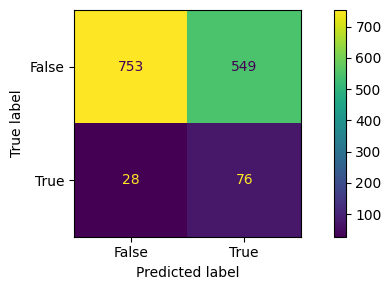

In [26]:
#Below code extracts the data for the participant from the merged_df dataframe and trains a model.
scores =[]
for participant in par_list:
    
    df = merged_df.loc[merged_df['Participant'] == participant]
    score = train_test(df)
    scores.append(score)


    